In [1]:
###Title: March Madness Analysis
###Author: Jonah Bostrom
###Started: 6/2/2022
###Finished: ???
###Description- Exploratory Data Analysis for March Madness Bracket
###Question

###Resources:  Use Modelling as a reference
###Also: https://data.world/sports/ncaa-mens-march-madness/workspace/file?filename=NCAA+Mens+March+Madness+Historical+Results.csv
###Explore: https://www.kaggle.com/datasets/christoffer/march-madness-overall-seeds-men 
###P6 and P7 (320); P12 (220)

## Notes
* Seed is inversely related to good teams (higher seed is lower ranking; 1 seed is the best seed)

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from datetime import datetime


#renamed CSV from "NCAA Mens March Madness Historical Results.csv" to "March_Madness_Games.csv"
mm_df= pd.read_csv("NCAA Mens March Madness Historical Results.csv")
mm_df.info()

#EDA- find the round the higher seed is most likely to lose in
#should I wait to do Info and head until after I've converted values?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           2050 non-null   object
 1   Round          2050 non-null   object
 2   Region         2038 non-null   object
 3   Winning Seed   2050 non-null   int64 
 4   Winner         2050 non-null   object
 5   Winning Score  2050 non-null   int64 
 6   Losing Seed    2050 non-null   int64 
 7   Loser          2050 non-null   object
 8   Losing Score   2050 non-null   int64 
 9   Overtime       130 non-null    object
dtypes: int64(4), object(6)
memory usage: 160.3+ KB


In [3]:
mm_df.head()

,Date,Round,Region,Winning Seed,Winner,Winning Score,Losing Seed,Loser,Losing Score,Overtime
0,3/14/85,Round of 64,East,1,Georgetown,68,16,Lehigh,43,NaN
1,3/14/85,Round of 64,East,4,"Loyola, Illinois",59,13,Iona,58,NaN
2,3/14/85,Round of 64,East,5,Southern Methodist,85,12,Old Dominion,68,NaN
3,3/14/85,Round of 64,East,8,Temple,60,9,Virginia Tech,57,NaN
4,3/14/85,Round of 64,Midwest,1,Oklahoma,96,16,North Carolina A&T,83,NaN


In [4]:
#Testing (save for late)
# date_time_str= (mm_df["Date"][0])
# date_time_obj = datetime.strptime(date_time_str, '%m/%d/%y')
# date_time_str

#Convert String to DateTime Object
mm_df["Date"]= pd.to_datetime(mm_df['Date'], format='%m/%d/%y').dt.date
mm_df


# mm_df["Date"][0]
# mm_df.groupby("Date")["Winning Seed"].count()

,Date,Round,Region,Winning Seed,Winner,Winning Score,Losing Seed,Loser,Losing Score,Overtime
0,1985-03-14,Round of 64,East,1,Georgetown,68,16,Lehigh,43,NaN
1,1985-03-14,Round of 64,East,4,"Loyola, Illinois",59,13,Iona,58,NaN
2,1985-03-14,Round of 64,East,5,Southern Methodist,85,12,Old Dominion,68,NaN
3,1985-03-14,Round of 64,East,8,Temple,60,9,Virginia Tech,57,NaN
4,1985-03-14,Round of 64,Midwest,1,Oklahoma,96,16,North Carolina A&T,83,NaN
...,...,...,...,...,...,...,...,...,...,...
2045,2016-03-27,Elite Eight,East,1,North Carolina,88,6,Notre Dame,74,NaN
2046,2016-03-27,Elite Eight,Midwest,10,Syracuse,68,1,Virginia,62,NaN
2047,2016-04-02,National Semifinals,NaN,1,North Carolina,83,10,Syracuse,66,NaN
2048,2016-04-02,National Semifinals,NaN,2,Villanova,95,2,Oklahoma,51,NaN


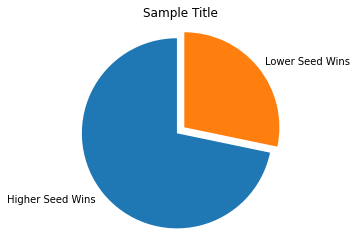

In [50]:
#Create Year Variable
mm_df['Year'] = pd.DatetimeIndex(mm_df['Date']).year 

#Create Total Points per game (not including OT) Variable
mm_df["Total Score"]= mm_df["Winning Score"]+ mm_df["Losing Score"]

###Detect Cases where underdog wins
# mm_df["Underdog Wins"]= mm_df["Winning Seed"] < 

###Exclude all play in games (11, 12, 16, in Opening Round)
###PLAY IN GAMES ONLY STARTED IN 2001
not_playin_game= mm_df["Round"] != "Opening Round"

#Testing (Save for later)
#CHECK LEN IS DIFFERENT
# print(len(mm_df[not_playin_game]) != len(mm_df))
# mm_df= mm_df[not_playin_game] # len(mm_df)
#check that all have been removed
# check= mm_df["Round"] == "Opening Round"
# mm_df[check]


#number of same seed games
mm_df[mm_df["Winning Seed"]== mm_df["Losing Seed"]]
#temporarily remove same Seed teams
diff_seed= mm_df["Winning Seed"]!= mm_df["Losing Seed"]
mm_df= mm_df[diff_seed]
# mm_df


# detect when lower seed wins; when same seed ignore (or later could look up ranking of that year and pick based on higher team ranked)
total_games= len(mm_df)
# mm_df[mm_df["Winning Seed"] > mm_df["Losing Seed"]]
mm_df["Underdog"]= mm_df["Winning Seed"] > mm_df["Losing Seed"]

#Percentage of lower seed/ underdog winning
underdog_wins= len(mm_df[mm_df["Winning Seed"] > mm_df["Losing Seed"]])
underdog_pct= underdog_wins/ total_games
favorited_wins= total_games- underdog_wins


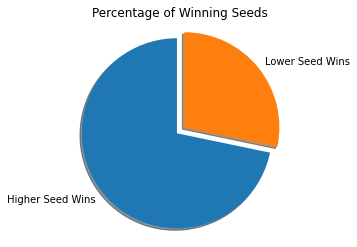

In [52]:

labels = "Higher Seed Wins", "Lower Seed Wins"
sizes = [favorited_wins, underdog_wins]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode= explode, shadow=True, startangle=90)
# autopct='%1.1f%%'
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# , startangle=90
plt.title('Percentage of Winning Seeds')

plt.show()


In [ ]:
#Plotting
# total underdog win ratio per season
# total underdog per round
# among the top 4 seeds which is most likely to lose?


# Modelling

In [12]:
###Feature Engineering

#length of names #multiple 
mm_df["Length"]= (mm_df["Winner"]).str.replace(" ", "")
mm_df["Length"]= (mm_df["Length"]).str.len()

#Number of words
mm_df["Words"]= (mm_df["Winner"]).str.split(" ")
mm_df["Words"]= (mm_df["Words"]).str.len()

#combination of number of words and number of letters
mm_df["Cool Names"]= mm_df["Words"] * mm_df["Length"]


# Pick features 
mod_df= mm_df[["Round", "Region", "Year", "Total Score", "Length", "Words", "Cool Names", "Underdog"]]


mod_df

,Round,Region,Year,Total Score,Length,Words,Cool Names,Underdog
0,Round of 64,East,1985,111,10,1,10,False
1,Round of 64,East,1985,117,15,2,30,False
2,Round of 64,East,1985,153,17,2,34,False
3,Round of 64,East,1985,117,6,1,6,False
4,Round of 64,Midwest,1985,179,8,1,8,False
...,...,...,...,...,...,...,...,...
2044,Elite Eight,West,2016,148,8,1,8,True
2045,Elite Eight,East,2016,162,13,2,26,False
2046,Elite Eight,Midwest,2016,130,8,1,8,True
2047,National Semifinals,NaN,2016,149,13,2,26,False


In [64]:
total_val_df= mod_df[["Total Score", "Underdog"]]

train, test= train_test_split(total_val_df, random_state=320, test_size=0.25)

log_mod= LogisticRegression()
log_mod.fit(train[["Total Score"]], train["Underdog"])

simp_scores = cross_val_score(log_mod, train[["Total Score"]], train["Underdog"])

print(f"AVG: {simp_scores.mean()}, STD: {simp_scores.std()}\n")        #returns a numpy array



AVG: 0.7155282709703485, STD: 0.00038158514960380253



In [71]:
#One Hot Encoder??
X= test["Total Score"].to_numpy().reshape(-1)

predict_df = pd.DataFrame({
    'Total Score': X.reshape(-1),
})

print(len(predict_df))
predict_df["prediction"] = log_mod.predict(predict_df)

#498
predict_df[predict_df["prediction"]== False]

# len(predict_df[predict_df["prediction"]== False]) #Incorrect model??
# inter= predict_df.loc[:,"prediction"].to_numpy() #return value
# inter

498


,Total Score,prediction
0,172,False
1,127,False
2,140,False
3,121,False
4,138,False
...,...,...
493,160,False
494,121,False
495,119,False
496,124,False


In [65]:
###Deprecated

#Creating Model, Splitting Data, and Fitting Model on train df

# pipe = Pipeline([
#             ("poly", PolynomialFeatures(degree=2)),
#             ("std", StandardScaler()),
#             ("lr", LogisticRegression(max_iter=500)),
#         ])

# train, test= train_test_split(mod_df, random_state=320, test_size=0.25)


# xcols= ["Total Score", "Length"]
# # xcols= ["Total Score"]
# pipe.fit(train[xcols], train["Underdog"])


# scores = cross_val_score(pipe, train[xcols], train["Underdog"])
# print(f"AVG: {scores.mean()}, STD: {scores.std()}\n")        #returns a numpy array

X= test["Total Score"].to_numpy().reshape(-1)
Y= test["Length"].to_numpy().reshape(-1)

predict_df = pd.DataFrame({
    'Total Score': X.reshape(-1),
    'Length': Y.reshape(-1),
})

print(len(predict_df))
predict_df["prediction"] = pipe.predict(predict_df)


len(predict_df[predict_df["prediction"]== False]) #Incorrect model??
# inter= predict_df.loc[:,"prediction"].to_numpy() #return value
# inter